In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm
import scipy.constants as scp
from scipy.integrate import quad
from tabulate import tabulate
from scipy import signal
import scipy.constants as const
from scipy.special import gamma

In [2]:
def sigma(x, y, dx, dy, label):
    s = np.abs(x-y)/np.sqrt(dx**2 + dy**2)
    print('Sigmaabweichung {} ='.format(str(label)), s)
    return s

---

# Importieren und grafische Darstellung der Messdaten

In [3]:
Ue = 460 #V
dUe = 10 #V

a1_U = Ue + np.array([0,25,50,75,100,125,150])
a1_dU = np.full(7, 10)
a1_N = np.array([1655,1782,1754,1734,1735,1762,1861])
a1_dN = np.sqrt(a1_N)

In [4]:
def linfit(x,a,b):
    return a*x+b

In [5]:
a1_pop, a1_cov = curve_fit(linfit, a1_U[1:], a1_N[1:], sigma=a1_dN[1:], absolute_sigma=True)

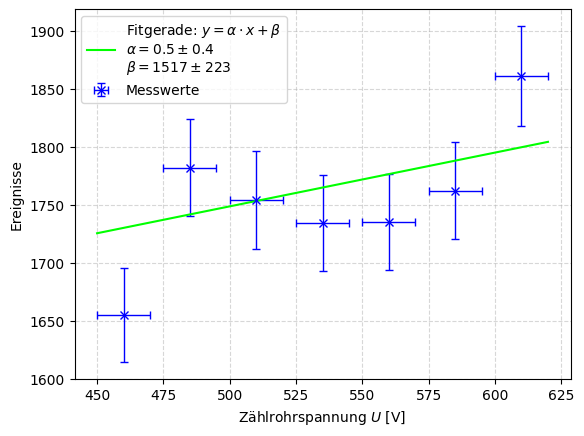

In [6]:
X = np.linspace(450,620,100)

plt.figure()
plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a1_U, a1_N, yerr=a1_dN, xerr=a1_dU, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)
plt.xlabel(r'Zählrohrspannung $U$ [V]')
plt.ylabel(r'Ereignisse')
plt.plot(X, linfit(X, *a1_pop), color='lime', 
        label="\n".join([r"Fitgerade: $y = \alpha \cdot x + \beta$", 
                          r'$\alpha ={:.1f}\pm{:.1f}$'.format(a1_pop[0], np.sqrt(a1_cov[0][0])), 
                          r'$\beta ={:.0f}\pm{:.0f}$'.format(a1_pop[1], np.sqrt(a1_cov[1][1]))]))
plt.legend()
plt.savefig('./plots/Plateau.pdf', format='PDF')

# Plateaubereich des Zählrohrs

In [7]:
U0 = 535 #V
dU0 = 10 #V

N1_0 = 14328
dN1_0 = np.sqrt(N1_0)

N3_0 = 42853
dN3_0 = np.sqrt(N3_0)

N1_1 = 14910
dN1_1 = np.sqrt(N1_1)

N3_1 = 44811
dN3_1 = np.sqrt(N3_1)

In [8]:
ratio1 = N1_1 - N1_0
dr1 = np.sqrt(dN1_1**2 + dN1_0**2)

ratio3 = N3_1 - N3_0
dr3 = np.sqrt(dN3_1**2 + dN3_0**2)

perc1 = ratio1/N1_0 * 100 #Prozent
dp1 = perc1 * np.sqrt((dr1/ratio1)**2 + (dN1_0/N1_0)**2)

perc3 = ratio3/N3_0 * 100
dp3 = perc3 * np.sqrt((dr3/ratio3)**2 + (dN3_0/N3_0)**2)

print("Prozentualer Anstieg 1min = ({} +/- {})".format(perc1, dp1))
print("Prozentualer Anstieg 3min = ({} +/- {})".format(perc3, dp3))

Prozentualer Anstieg 1min = (4.061976549413735 +/- 1.193888486093682)
Prozentualer Anstieg 3min = (4.569108347140224 +/- 0.691275080500964)


## Signifikanz der gemessenen Anstiege

In [9]:
_ = sigma(perc1, 0, dp1, 0, 'Prozentualer Anstieg 1min')
_ = sigma(perc3, 0, dp3, 0, 'Prozentualer Anstieg 3min')

Sigmaabweichung Prozentualer Anstieg 1min = 3.402308169253087
Sigmaabweichung Prozentualer Anstieg 3min = 6.609681841603507


## Benötigte Messzeit für 1%-Fehler

In [10]:
err1 = dr1/ratio1
err3 = dr3/ratio3

print("rel. Fehler 1min = {}".format(err1))
print("rel. Fehler 3min = {}".format(err3))

rel. Fehler 1min = 0.2937993605587172
rel. Fehler 3min = 0.1512160725123355


In [11]:
tges1 = (err1 /0.01)**2 * (1 * 60)
tges3 = (err3 /0.01)**2 * (3 * 60)

print("ges. Messdauer 1min = {}s bzw. {}h".format(tges1, tges1/3600))
print("ges. Messdauer 3min = {}s bzw. {}h".format(tges3, tges3/3600))

ges. Messdauer 1min = 51790.83855882667s bzw. 14.38634404411852h
ges. Messdauer 3min = 41159.34105490062s bzw. 11.43315029302795h


## 1- und 2-$\sigma$-Umgebung unserer Ergebnisse

In [12]:
print(r'1-σ-Umgebung vom Prozentualen Anstieg bei 1min: [{}, {}]'.format(np.round(perc1-dp1, 2), np.round(perc1+dp1,2)))
print(r'1-σ-Umgebung vom Prozentualen Anstieg bei 3min: [{}, {}]'.format(np.round(perc3-dp3, 2), np.round(perc3+dp3, 2)))

1-σ-Umgebung vom Prozentualen Anstieg bei 1min: [2.87, 5.26]
1-σ-Umgebung vom Prozentualen Anstieg bei 3min: [3.88, 5.26]


In [13]:
print(r'2-σ-Umgebung vom Prozentualen Anstieg bei 1min: [{}, {}]'.format(np.round(perc1-2*dp1, 2), np.round(perc1+2*dp1, 2)))
print(r'2-σ-Umgebung vom Prozentualen Anstieg bei 3min: [{}, {}]'.format(np.round(perc3-2*dp3, 2), np.round(perc3+2*dp3, 2)))

2-σ-Umgebung vom Prozentualen Anstieg bei 1min: [1.67, 6.45]
2-σ-Umgebung vom Prozentualen Anstieg bei 3min: [3.19, 5.95]


# Auswertung der Daten mit hoher mittlerer Ereigniszahl

In [14]:
a3_ZpT, a3_N = np.loadtxt('./data/data_aufgabe2.txt', unpack=True, skiprows=4, delimiter=',')
a3_dN = np.sqrt(a3_N)

In [15]:
def gaussian(x, A, mu, sig):
    return A/(np.sqrt(2*np.pi)*sig) * np.exp(-(x-mu)**2/(2*sig**2))

def poisson(x, A, mu):
    return A * np.exp(-mu) * mu**x /gamma(x+1)

In [16]:
a3_pop_g, a3_cov_g = curve_fit(gaussian, a3_ZpT[20:-19], a3_N[20:-19], sigma=a3_dN[20:-19], absolute_sigma=True, p0=[2000,75,8])

In [17]:
a3_pop_p, a3_cov_p = curve_fit(poisson, a3_ZpT[20:-19], a3_N[20:-19], sigma=a3_dN[20:-19], absolute_sigma=True, p0=[2000,75])

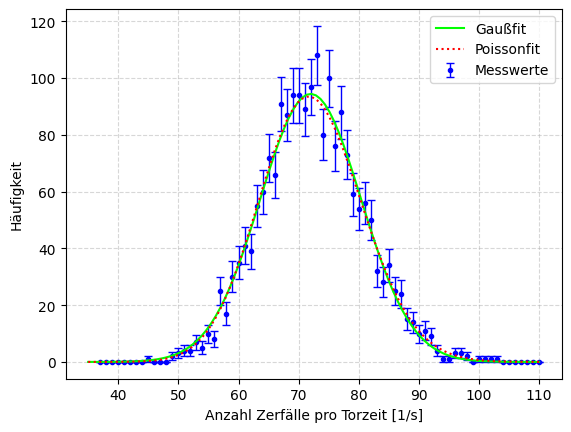

In [18]:
X = np.linspace(35,110,100)

plt.figure()
plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a3_ZpT, a3_N, yerr=a3_dN, fmt='.', color='blue', label='Messwerte', capsize=3, lw=1)
plt.ylabel(r'Häufigkeit')
plt.xlabel(r'Anzahl Zerfälle pro Torzeit [1/s]')
plt.plot(X, gaussian(X, *a3_pop_g), color='lime', label='Gaußfit', zorder=10)
plt.plot(X, poisson(X, *a3_pop_p), color='red', label='Poissonfit', zorder=11, linestyle=':')
plt.legend()
plt.savefig('./plots/Ngroß.pdf', format='PDF')

In [19]:
print("Gaussfit:")
print("A=",a3_pop_g[0], ", Standardfehler=", np.sqrt(a3_cov_g[0][0]))
print("mu=",a3_pop_g[1], ", Standardfehler=", np.sqrt(a3_cov_g[1][1]))
print("sig=",a3_pop_g[2], ", Standardfehler=", np.sqrt(a3_cov_g[2][2]))
print("Poissonfit:")
print("A_p=",a3_pop_p[0], ", Standardfehler=", np.sqrt(a3_cov_p[0][0]))
print("mu_p=",a3_pop_p[1], ", Standardfehler=", np.sqrt(a3_cov_p[1][1]))

Gaussfit:
A= 1989.1104720815874 , Standardfehler= 46.84464991076517
mu= 72.00187445783394 , Standardfehler= 0.21915054667311396
sig= 8.402549333933674 , Standardfehler= 0.20830114508438774
Poissonfit:
A_p= 1990.3250570061998 , Standardfehler= 45.61724901438288
mu_p= 72.18173037291598 , Standardfehler= 0.21683249218455716


In [20]:
#Gauss:
chi2_g=np.sum((gaussian(a3_ZpT[20:-19],*a3_pop_g)-a3_N[20:-19])**2/a3_dN[20:-19]**2)
dof_g=len(a3_ZpT[20:-19])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)

#Poisson:
chi2_p=np.sum((poisson(a3_ZpT[20:-19],*a3_pop_p)-a3_N[20:-19])**2/a3_dN[20:-19]**2)
dof_p=len(a3_ZpT[20:-19])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)

#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g,"%")
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

chi2_g= 24.559363909346516
chi2_red_g= 0.7674801221670786
chi2_p= 23.54616897104148
chi2_red_p= 0.7135202718497419
Wahrscheinlichkeit Gauss= 82.0 %
Wahrscheinlichkeit Poisson= 89.0 %


# Auswertung der Daten mit kleiner Ereigniszahl

In [21]:
a4_ZpT, a4_N = np.loadtxt('./data/data_aufgabe3.txt', unpack=True, skiprows=4, delimiter=',')
a4_dN = np.sqrt(a4_N)

In [22]:
a4_pop_g, a4_cov_g = curve_fit(gaussian, a4_ZpT[:12], a4_N[:12], sigma=a4_dN[:12], absolute_sigma=True, p0=[5000,4,2])

In [23]:
a4_pop_p, a4_cov_p = curve_fit(poisson, a4_ZpT[1:12], a4_N[1:12], sigma=a4_dN[1:12], absolute_sigma=True, p0=[5000,4.5])

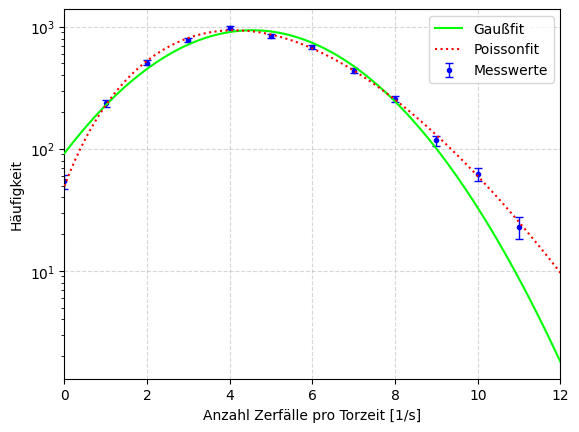

In [24]:
X = np.linspace(0,12,100)

plt.figure()
plt.xlim((0,12))
#plt.ylim((0,1100))
plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a4_ZpT[:12], a4_N[:12], yerr=a4_dN[:12], fmt='.', color='blue', label='Messwerte', capsize=3, lw=1)
plt.ylabel(r'Häufigkeit')
plt.xlabel(r'Anzahl Zerfälle pro Torzeit [1/s]')
plt.plot(X, gaussian(X, *a4_pop_g), color='lime', label='Gaußfit', zorder=10)
plt.plot(X, poisson(X, *a4_pop_p), color='red', label='Poissonfit', zorder=11, linestyle=':')
plt.legend()
plt.yscale('log')
plt.savefig('./plots/Nklein.pdf', format='PDF')

In [25]:
print("Gaussfit:")
print("A=",a4_pop_g[0], ", Standardfehler=", np.sqrt(a4_cov_g[0][0]))
print("mu=",a4_pop_g[1], ", Standardfehler=", np.sqrt(a4_cov_g[1][1]))
print("sig=",a4_pop_g[2], ", Standardfehler=", np.sqrt(a4_cov_g[2][2]))
print("Poissonfit:")
print("A_p=",a4_pop_p[0], ", Standardfehler=", np.sqrt(a4_cov_p[0][0]))
print("mu_p=",a4_pop_p[1], ", Standardfehler=", np.sqrt(a4_cov_p[1][1]))

Gaussfit:
A= 4944.612364128406 , Standardfehler= 70.70423984237354
mu= 4.543426892360781 , Standardfehler= 0.03109527591610403
sig= 2.1080511178725807 , Standardfehler= 0.02454710035391609
Poissonfit:
A_p= 4990.90460929385 , Standardfehler= 71.10849982627033
mu_p= 4.615267169637306 , Standardfehler= 0.031592041453627914


In [26]:
#Gauss:
chi2_g=np.sum((gaussian(a4_ZpT[:12],*a4_pop_g)-a4_N[:12])**2/a4_dN[:12]**2)
dof_g=len(a4_ZpT[:12])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)

#Poisson:
chi2_p=np.sum((poisson(a4_ZpT[1:12],*a4_pop_p)-a4_N[1:12])**2/a4_dN[1:12]**2)
dof_p=len(a4_ZpT[1:12])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)

#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g,"%")
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

chi2_g= 84.42090815486779
chi2_red_g= 9.380100906096422
chi2_p= 7.168593420692852
chi2_red_p= 0.7965103800769835
Wahrscheinlichkeit Gauss= 0.0 %
Wahrscheinlichkeit Poisson= 62.0 %
